# Predictions of the overall satisfaction of an airline passenger based on different flight experiences using decision trees and testing the models' robustness to label noise

Advanced Machine Learning, Project 1: Alper Kaya and Khanh Minh Dinh

## Introduction: 

Air travel has witnessed an unprecedented growth over the last century and nowadays plays a vital role in human and commodity mobility. This proliferation has created a hostile competition among airlines in branding and providing the best services both on and off the board. Thus, it is understandable that major airlines, especially national flag ones, are pouring money into modernizing their lounges at airports, aircraft and in-flight services so that customers would always picture them as luxurious service providers. Additionally, passengers have the tendency to put more expectations on their journeys in the air due to the common psychology that airfares are often more expensive than travelling by other means of transportation, such as buses or trains. Hence, customers highly demand comfort, punctuality, good customer service and a smooth process from airlines. As a result, it is even more lucrative for aviation companies to dig deeper into the improvements which would actually increase the satisfaction of their customers.

Therefore, this research aims to answer the question of how different flight experiences contribute to the overall satisfaction of an airline passenger. Under these circumstances, Decision Trees (including unpruned Classification Tree, Pruned Classification Tree and Random Forests) will be utilized, as the primary machine learning method to look into how different factors affect the overall pleasure of individuals. Since the goal of this study is to solve a binary classification problem (“Satisfied” or “Neutral or dissatisfied”), data mining and supervised machine learning are applied to extract important information from the dataset and simulate human decision-making and predict the outcomes based on labelled data. Furthermore, to complement the project, the same three models are evaluated in a controlled robustness experiment by flipping a portion of randomly selected training output labels (e.g., 0 --> 1 and 1 --> 0) at different levels of noise. The test labels remain, however, unchanged, enabling  a direct comparison of which tree‑based method holds the best performance under corrupted output labels. This experiment aligns with a potential real-life scenario, where, for instance, some survey participants accidentally gave a wrong reply, or some of the dataset became corrupted during its collection.

The dataset analysed in this research was obtained from Kaggle.com, which contains an airline passenger satisfaction survey. While the model was fitted on a training dataset, the predictions about the satisfaction level of individuals would be generated using a separate test dataset. Additionally, the full dataset was already well pre-processed and split into a training dataset (80%) and a test dataset (20%). 25 different factors were taken into account in determining if a passenger was satisfied (or neutral/dissatisfied) with the airline services. The table below displays the variables’ names, their descriptions, their types and their measuring units:

In [148]:
import pandas as pd

service_scale = "0 = Not Applicable; 1–5 rating (1 = lowest, 5 = highest)"

rows = [
    {"Variable": "id",
     "Description": "ID number of each survey response",
     "Type": "integer",
     "Unit / Scale": "-"},
    {"Variable": "Gender",
     "Description": "Gender of the passenger",
     "Type": "categorical",
     "Unit / Scale": "Female, Male"},
    {"Variable": "Customer Type",
     "Description": "Customer loyalty status",
     "Type": "categorical",
     "Unit / Scale": "Loyal customer, disloyal customer"},
    {"Variable": "Age",
     "Description": "Age of the passenger",
     "Type": "integer",
     "Unit / Scale": "years"},
    {"Variable": "Type of Travel",
     "Description": "Purpose of the flight",
     "Type": "categorical",
     "Unit / Scale": "Personal Travel, Business Travel"},
    {"Variable": "Class",
     "Description": "Travel class in the plane",
     "Type": "categorical",
     "Unit / Scale": "Business, Eco, Eco Plus"},
    {"Variable": "Flight distance",
     "Description": "Flight distance of the journey",
     "Type": "integer",
     "Unit / Scale": "kilometers"},
]

service_vars = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Check-in service",
    "Inflight service",
    "Cleanliness",
]

for v in service_vars:
    rows.append({
        "Variable": v,
        "Description": f"Satisfaction level of {v.lower()}",
        "Type": "integer (ordinal 0–5)",
        "Unit / Scale": service_scale
    })

rows.extend([
    {"Variable": "Departure Delay in Minutes",
     "Description": "Minutes delayed at departure",
     "Type": "float",
     "Unit / Scale": "minutes"},
    {"Variable": "Arrival Delay in Minutes",
     "Description": "Minutes delayed at arrival",
     "Type": "float",
     "Unit / Scale": "minutes"},
    {"Variable": "Satisfaction",
     "Description": "Airline satisfaction label",
     "Type": "categorical",
     "Unit / Scale": "Satisfied vs neutral or dissatisfied"}
])

data_dict = pd.DataFrame(rows)

# in a notebook, this already shows nicely:
data_dict


,Variable,Description,Type,Unit / Scale
0,id,ID number of each survey response,integer,-
1,Gender,Gender of the passenger,categorical,"Female, Male"
2,Customer Type,Customer loyalty status,categorical,"Loyal customer, disloyal customer"
3,Age,Age of the passenger,integer,years
4,Type of Travel,Purpose of the flight,categorical,"Personal Travel, Business Travel"
5,Class,Travel class in the plane,categorical,"Business, Eco, Eco Plus"
6,Flight distance,Flight distance of the journey,integer,kilometers
7,Inflight wifi service,Satisfaction level of inflight wifi service,integer (ordinal 0–5),"0 = Not Applicable; 1–5 rating (1 = lowest, 5 ..."
8,Departure/Arrival time convenient,Satisfaction level of departure/arrival time c...,integer (ordinal 0–5),"0 = Not Applicable; 1–5 rating (1 = lowest, 5 ..."
9,Ease of Online booking,Satisfaction level of ease of online booking,integer (ordinal 0–5),"0 = Not Applicable; 1–5 rating (1 = lowest, 5 ..."


## Literature Review

As operating in the service sector, airlines are very interested in conducting extensive research to optimize the satisfaction of their customers, especially when airlines operating in a competitive market have higher incentives in satisfying their customers than their rivals whose markets are oligopolistic (Steven et al., 2012). Thus, the very first vital step of every research was to carry out data cleaning or data preprocessing on the original dataset so that the issues of imbalance, missing values, duplicates or multicollinearity are effectively addressed. For the same dataset, Mirthipati (2024) overcame these mentioned problems by using Python to check and affirm the symmetry of the data distribution (where the number of “Satisfied” outcomes is equal to the number of “Neutral and Dissatisfied” outcomes). This step involved removing duplicate entries and irrelevant columns such as “unnamed” and ‘id” while null values were imputed with the median.

Data mining then takes place to study the patterns of the inputs and extract important information from the processed dataset. Baswardoro et al. (2019) accordingly carried out data mining as a necessary prior step to the application and comparison of machine learning methods, such as Decision Tree and Random Forest, in an airline customer satisfaction classification recommendation.

In terms of algorithmic performance, binary classification problems have often been handled by conventional methods such as Logistic Regression and k-Nearest Neighbour due to their simplicity and interpretability (Hastie et al., 2023). However, tree-based methods such as Decision Tree and Random Forests appear to be superior compared to the two methods mentioned above as they contain no parametric structure and are able to deal with large and complicated data (Song and Lu, 2015). Particularly, Hastie et al. (2023) clarified that while unpruned trees are allowed to grow to its full depth (until every leaf contains only one class or no further splits are possible) and thus achieve the train accuracy of 100% but poor test accuracy due to their high complexity, pruned trees with fewer splits offer better interpretation and lower variance despite some little bias. As an upgrade to Decision Trees, Random Forests improve the accuracy by bootstrapping the Decision Trees and decorrelating them using different subsets of predictors. By just observing indicators such as the accuracy, the confusion matrix and F1-score, Hong et al. (2023) also proved that Random Forest outperformed other classification methods, including k-NN and logistic regression.

In addition, as the chosen dataset has been proven to have balanced classes, simplicity and relevance, studies comparing multiple classifiers on airline customer satisfaction display a preference for using the classification metrics, including cross-validation accuracy and the test accuracy to determine the most efficient model (Mirthipati, 2024). This is further supported by AlHabbal (2022), who added the calculations of metrics such as accuracy, precision and sensitivity along with confusion matrices to evaluate the performance of each examined method.

## Methods

Research question: How well do an Unpruned Classification Tree, a Pruned Classification Tree and Random Forest perform in predicting airline passenger satisfaction in terms of test accuracy, key features for satisfaction, and robustness to different levels of label noise?

This research project investigates airline passenger satisfaction using supervised machine learning in the context of a binary classification problem. The outcome, if a survey participant is satisfied or neutral/dissatisfied, is predicted by using several service-related, demographic and operational features. Particularly, tree-based classification methods are used on labelled training and test data since they can handle mixed data types, while ensuring better interpretable decision rules and understanding how important features are for the output prediction. Moreover, decision trees are chosen over bootstrap, regression splines and SVM since they align the best with not only the data structure but also our research question, i.e.,  testing accuracy, feature importance and testing the robustness. More precisely, for this project, we decided against bootstrap since our main goal is not to assess or improve an already existing model and against SVMs since they would not give clear feature importance results while being too complex for our dataset. Regression splines are also not considered for this project, as they are better suited for data with continuous variables, and hence for regression problems. 

Therefore, the two main machine learning algorithms applied in this project are both tree-based methods, Decision Trees and Random Forests. Decision trees are selected due to their interpretability, non-parametric nature, and suitability for mixed feature types. Trees capture non-linear interactions and feature hierarchies naturally, hence also explaining the most important features contributing to the prediction of an output. In this project, both Unpruned and Pruned Classification Trees are taken into consideration.

The Unpruned Classification Tree method allows the tree to grow to its full depth until every leaf contains only one class or no further splits are possible. In this case, the tree will learn the data until it reaches 100% train accuracy. In contrast, Tree pruning is a technique to simplify a tree by removing branches that are not influential in predictive performance. Indicators such as maximum depth, number of leaves or splits can be adjusted to avoid overfitting and balance between model complexity and training error. Random forests improve standard bagging by aggregating decision trees grown on bootstrapped training samples. To prevent these trees from being highly correlated due to dominant features, Random Forest restricts each split to a random subset of features. This process decorrelates the trees, ensuring that the ensemble captures important and varying patterns in the data, resulting in a more stable model that reduces variance compared to individual decision trees.

Hence, all three models take different predictive approaches with particular trade-offs that make them suitable for comparison when it comes to predictive accuracy and testing their stability and robustness when noise is introduced. 

As a first step, the Airline Passenger Satisfaction dataset is analysed and inspected to understand the variables, types, missing values, class balance and feature correlations. Features that are only identifiers for the survey and flight-delay related variables, as well, are removed due to them not containing relevant information and risking introducing unnecessary noise to our model. 

Furthermore, categorical predictors, such as gender, customer type, type of travel and class, are transformed into numerical variables by one-hot encoding, i.e. each unique category is represented by a binary column with a value of 1 or 0. Looking into class balance gives insight into understanding if the dataset needs, for instance, the introduction of weights to correct the imbalance.  The correlation between the numerical variables is looked into to understand the relationship between the features and to determine if there is multicollinearity in our dataset. Since Decision Tree-based methods are not too sensitive to correlated predictors in contrast to linear models, no further actions are taken here. However, it highlights the benefit of Decision Trees as each split in the tree only uses one feature, meaning correlated features are competing with each other, keeping the model more stable.

After preprocessing the data, for all three tree-based models, Unpruned Classification Tree, Pruned Classification Tree and Random Forest, the respective classifiers are estimated on the training data. Hyperparameters related to the size and depth of the trees, as well as the number of trees (Random Forest), are tuned by using cross-validation on the training set. Each model will then also be evaluated on the test dataset on accuracy and confusion matrix-related metrics. Moreover, for each model, the top 10 most important features will be looked into to understand what influences satisfaction the most. 

Lastly, to analyse how robust and stable the three models are to label noise, a copy of the training dataset is created where the output labels are randomly flipped in increasing levels (0%,10%,20%,30%). At each level of introduced noise, the classifiers are trained again, but with the previously obtained hyperparameters to ensure compatibility and to reduce computational time. Each model will be tested on the unchanged test dataset for accuracy and then compared with the other to understand which model performs the best under these new conditions. This way, model complexity and regularisation can be analysed in terms of robustness to partially wrong labels in the dataset. 


Loading the relevant packages and the training and test dataset:

In [63]:
#Loading relevant packages

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as skm
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          plot_tree,
                          export_text)
from sklearn.model_selection import ShuffleSplit, cross_validate, KFold
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay as CMD
from sklearn.metrics import precision_score, recall_score, f1_score
from copy import deepcopy

In [64]:
# Loading the datasets
s_train = pd.read_csv('train.csv', na_values=['', 'NA', 'NaN', 'NULL']) 
s_test = pd.read_csv('test.csv', na_values=['', 'NA', 'NaN', 'NULL'])

## Exploratory data analysis and data preprocessing

We will now look at the data in our dataset to understand what we need to clean and wrangle before we start fitting our models.
Firstly, we are taking a look at the training and test dataset to get an overview of the included variables in the dataset:

In [140]:
print("Train dataset (first 5 rows):")
display(s_train.head(10))
print("\nTest dataset(first 5 rows):")
display(s_test.head(10))

Train data set (first 5 rows):


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,5,3,3,4,4,3,3,3,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,2,1,1,3,4,4,4,4,1,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,2,2,3,3,4,3,5,2,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,5,5,4,5,4,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,3,3,1,1,2,1,4,1,2,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,3,3,2,2,3,4,4,3,2,neutral or dissatisfied



Test data set(first 5 rows):


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,4,3,5,5,5,5,2,5,5,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,5,4,4,4,4,3,4,5,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,2,4,1,3,2,2,2,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,4,1,1,1,1,3,1,4,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,1,2,2,2,2,2,4,2,4,satisfied
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,5,3,5,4,3,1,1,2,5,satisfied
6,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,...,5,5,5,5,5,5,4,5,3,satisfied
7,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,2,...,4,5,4,4,4,4,5,4,3,satisfied
8,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,2,...,5,5,5,2,2,5,3,3,5,satisfied
9,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,2,...,4,4,4,4,4,4,5,4,4,satisfied


Our dataset includes 24 features and 1 target output. However, our dataset also includes unique identifiers related to the survey participants, such as Unnamed: 0 and id which will be removed later now.

In order to understand the data types for our dataset we will now look at the data types of our datasets:

In [113]:
pd.concat([s_train.dtypes, s_test.dtypes], axis=1, keys=['Train Types', 'Test Types'])

,Train Types,Test Types
Gender,object,object
Customer Type,object,object
Age,int64,int64
Type of Travel,object,object
Class,object,object
Flight Distance,int64,int64
Inflight wifi service,int64,int64
Departure/Arrival time convenient,int64,int64
Ease of Online booking,int64,int64
Gate location,int64,int64


Most features are stored as integer or float ratings, while Gender, Customer Type, Type of Travel, Class, and satisfaction are stored as categorical variables.

We are now checking for any missing values in our features: 

In [67]:
missing_train = s_train.isnull().sum()
missing_test  = s_test.isnull().sum()

missing = pd.DataFrame({
    'train_missing': missing_train,
    'test_missing':  missing_test
})

missing

,train_missing,test_missing
Unnamed: 0,0,0
id,0,0
Gender,0,0
Customer Type,0,0
Age,0,0
Type of Travel,0,0
Class,0,0
Flight Distance,0,0
Inflight wifi service,0,0
Departure/Arrival time convenient,0,0


While for both the training and test datasets, we have missing values for the arrival delay in minutes, we will leave them as they are since the columns Departure Delay in Minutes and Arrival Delay in Minutes will be deleted.

In order to understand if we need to resample or assign class weights to ensure our tree-based classifier is unbiased, we will check the overall class distribution of our output variable satisfaction:

In [115]:
pd.concat([
    s_train['satisfaction'].value_counts(normalize=True),
    s_test['satisfaction'].value_counts(normalize=True)
], axis=1, keys=['Train Output Proportion', 'Test Output Proportion'])

,Train Output Proportion,Test Output Proportion
satisfaction,,
neutral or dissatisfied,0.566667,0.561018
satisfied,0.433333,0.438982


We can see that both test and training datasets are approximately balanced for the output/target, so we do not have to take further steps to ensure an unbiased tree-based classifier. 

While Decision Tree models can handle multicollinearity, we will still look into the correlation structure of the features:

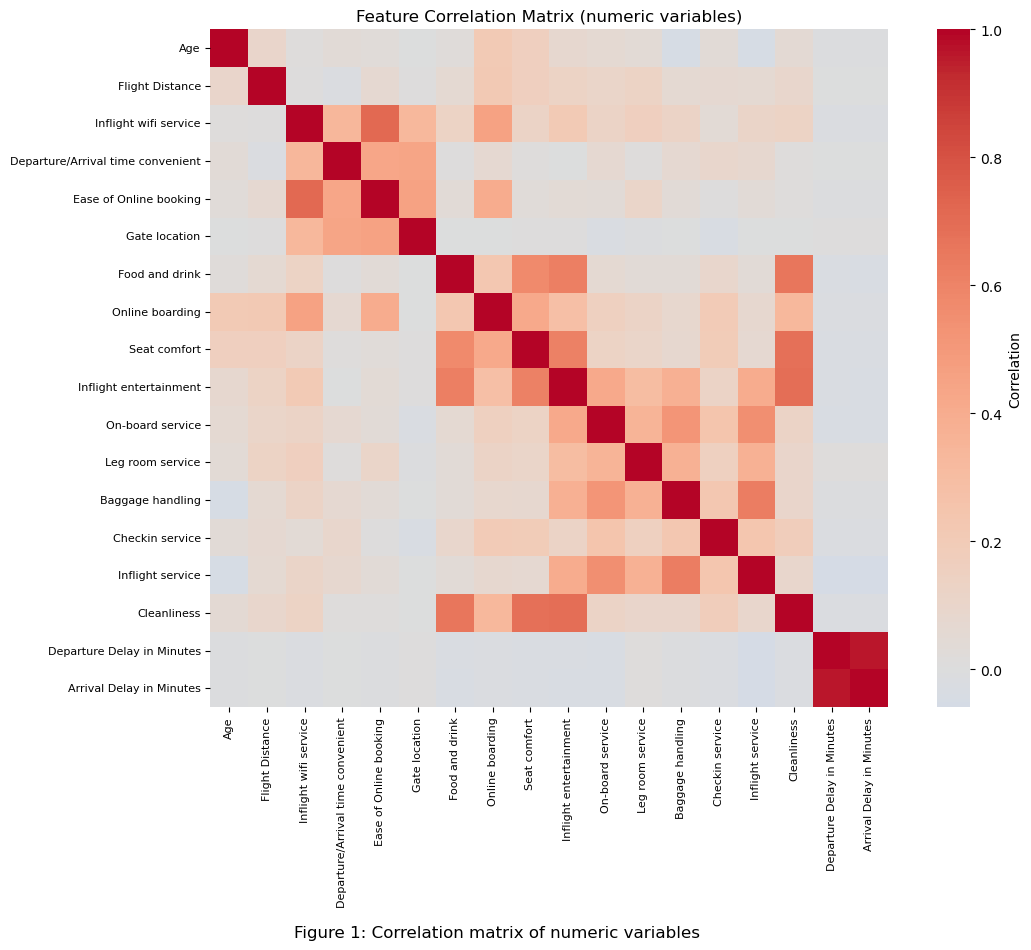

Moderate correlations (0.5 < |r| ≤ 0.7):
                       var1                    var2      corr
122  Inflight entertainment             Cleanliness  0.691815
114            Seat comfort             Cleanliness  0.678534
95           Food and drink             Cleanliness  0.657760
139        Baggage handling        Inflight service  0.628561
89           Food and drink  Inflight entertainment  0.622512
108            Seat comfort  Inflight entertainment  0.610590
88           Food and drink            Seat comfort  0.574556
128        On-board service        Inflight service  0.550782
126        On-board service        Baggage handling  0.519134

High correlations (|r| > 0.7):
                           var1                      var2      corr
152  Departure Delay in Minutes  Arrival Delay in Minutes  0.965481
34        Inflight wifi service    Ease of Online booking  0.715856


In [69]:
# Copy analysis and droping of  only obvious non-features
eda = s_train.drop(columns=['Unnamed: 0', 'id'], errors='ignore')

# Correlation on numeric variables BEFORE deleting delays or one-hot
num_cols = eda.select_dtypes(include=[np.number]).columns
corr_matrix = eda[num_cols].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    square=True,
    cbar_kws={'label': 'Correlation'}
)
plt.title('Feature Correlation Matrix (numeric variables)')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)
plt.figtext(0.5, 0.07, "Figure 1: Correlation matrix of numeric variables", ha="center", fontsize=12)
plt.show()

# Flattening of correlations
corr_long = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_long.columns = ['var1', 'var2', 'corr']

mod_corr  = corr_long[(corr_long['corr'].abs() > 0.5) & (corr_long['corr'].abs() <= 0.7)]
high_corr = corr_long[corr_long['corr'].abs() > 0.7]

print("Moderate correlations (0.5 < |r| ≤ 0.7):")
print(mod_corr.sort_values('corr', key=lambda s: s.abs(), ascending=False))

print("\nHigh correlations (|r| > 0.7):")
print(high_corr.sort_values('corr', key=lambda s: s.abs(), ascending=False))


We can see that both Inflight wifi service and Ease of online booking and Departure Delay and Arrival Delay in Minutes are highly correlated, but also that some features like Inflight entertainment and Food and drink are moderately correlated. Hence, especially service-related features are moving together. As aforementioned, with several features showing moderate to strong correlations, trees and random forests can handle this quite well since these models select one of the correlated variables at each split. Hence, we do not need to take further steps. 

Furthermore, during our explorative data analysis, we can see that both datasets include irrelevant columns which we merely used for identification purposes during the survey conduction (Unnamed: 0 and id). Since they do not contain any information about our output satisfaction, we will remove them. This way, we can avoid adding noise to our model and reduce the risk of our model overfitting. 

We can also see that both datasets include the variables Gender, Customer Type, Type of Travel, Class, and that the target output satisfaction is categorical and stored as a text, i.e., a string variable. However, since Decision Tree-based algorithms operate on numerical inputs, these features will be encoded in numeric form. Since both features, Arrival and Departure delays in minutes, do not contain any information about the service quality or demographics and are often outside of the airline's capability to prevent, we decided to drop those features. Having those two features being highly correlated and having them contain missing values also contributed to our decision. On that note, we will keep the flight distance variable as it does contain information, i.e. how services might be differently rated for different flight distances. 

Afterwards, we will check if the transformation was successful:

In [149]:
# 1. Dropping Unamed, ID and delay columns
cols_to_drop = [
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'Unnamed: 0',
    'id'
]

s_train = s_train.drop(columns=cols_to_drop, errors='ignore')
s_test  = s_test.drop(columns=cols_to_drop,  errors='ignore')

# 2. Separating features and target
y_train = s_train['satisfaction']
y_test  = s_test['satisfaction']
X_train = s_train.drop(columns=['satisfaction'])
X_test  = s_test.drop(columns=['satisfaction'])

# 3. One-hot encoding of categorical features for the same columns in train and test
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=False)
X_test  = pd.get_dummies(X_test,  columns=cat_cols, drop_first=False)

# 4. Aligning columns so train and test match
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# 5. Label encoding the target
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# 6. Verifying results
print("Successful data transformation:")
print("---------------------------")
print(f"Train dataset: {X_train.shape[0]:,} rows, {X_train.shape[1]} variables")
print(f"Test dataset:  {X_test.shape[0]:,} rows, {X_test.shape[1]} variables")
print(f"Output: 0={le.classes_[0]}, 1={le.classes_[1]}")

Successful data transformation:
---------------------------
Train dataset: 103,904 rows, 25 variables
Test dataset:  25,976 rows, 25 variables
Output: 0=neutral or dissatisfied, 1=satisfied


## Model training and evaluation

We have concluded our exploratory data analysis and data preprocessing, and therefore, as the next step, we will train and evaluate our three different Decision Tree classifier models. 

### Unpruned Classification Tree

We decided to first let a full, unpruned tree grow to evaluate the training accuracy and test accuracy. We do so by only using the training dataset and by using Entropy for information gain. This unpruned tree will serve as a baseline since it shows the maximum possible flexibility of a single Classification Tree on this dataset.

In [71]:
# Training the Unpruned tree
clf_full = DTC(criterion='entropy', max_depth = None, random_state=20)
clf_full.fit(X_train, y_train_enc)

# Train accuracy of the unpruned tree
y_pred_train = clf_full.predict(X_train)
train_acc = accuracy_score(y_train_enc, y_pred_train)
print(f"Unpruned Tree Train accuracy (unpruned): {train_acc:.4f}")

# Tree size
depth_full  = clf_full.get_depth()
leaves_full = clf_full.get_n_leaves()

print(f'Depth of the tree:', depth_full)
print(f'Number of leaves:', leaves_full)

Unpruned Tree Train accuracy (unpruned): 1.0000
Depth of the tree: 42
Number of leaves: 3884


The model's training accuracy is 100% which means the model is perfectly fitted on the training data. However, this strongly indicates overfitting and high variance as the tree becomes not only very deep with 42 levels but also very bushy with 3884 leaves. This behaviour is expected because the tree was allowed to grow until no further splits were possible. Furthermore, this might also indicate that it captures noise and will not generalise well enough when it comes to new unseen data. Therefore, as the next step, we will evaluate the test performance and also look at how well the tree is performing on each class by constructing a confusion matrix.

              Model evaluation – Unpruned Tree              

Test Accuracy: 0.9459

Test set metrics (unpruned)
---------------------------
Precision : 0.9364
Recall       : 0.9407
F1-score  : 0.9385


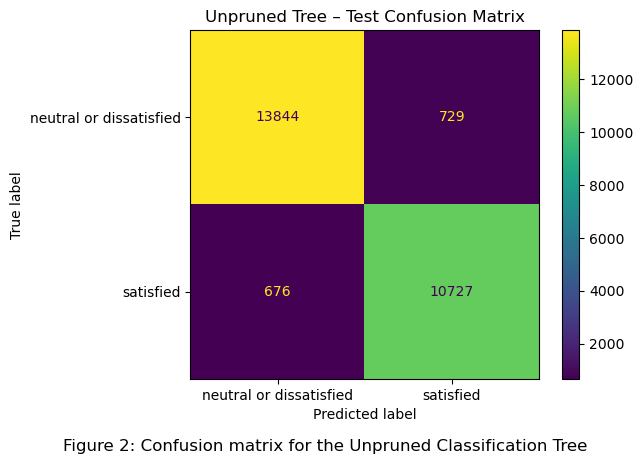

In [141]:
# Test performance of the Unpruned Tree
y_pred_test = clf_full.predict(X_test)
test_acc = accuracy_score(y_test_enc, y_pred_test)
cm = confusion_matrix(y_test_enc, y_pred_test)

print("="*60)
print("Model evaluation – Unpruned Tree".center(60))
print("="*60)
print(f"\nTest Accuracy: {test_acc:.4f}\n")

#Confusion matrix-related metrics 
precision_un = precision_score(y_test_enc, y_pred_test)
recall_un    = recall_score(y_test_enc, y_pred_test)
f1_un        = f1_score(y_test_enc, y_pred_test)

print("Test set metrics (unpruned)")
print("---------------------------")
print(f"{'Precision':10s}: {precision_un:6.4f}")
print(f"{'Recall':10s}   : {recall_un:6.4f}")
print(f"{'F1-score':10s}: {f1_un:6.4f}")
print("="*60)

#Confusion matrix
disp = CMD(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(values_format='d')
plt.title("Unpruned Tree – Test Confusion Matrix")
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.05, "Figure 2: Confusion matrix for the Unpruned Classification Tree", ha="center", fontsize=12)
plt.show()


Despite a training accuracy of 100% with indications of high variance and overfitting, the fitted unpruned tree has a test accuracy of around 94.6%. This means that the model generalises very well and correctly classifies almost all survey participants in terms of satisfaction level. Furthermore, the model achieves a precision score of 93.64% for the class satisfied, which indicates that when the tree predicts a passenger is satisfied with the airlines, it is correct in 93.64% of the time.  
Our model also achieves a recall score of 94.1% which implies that 94.1% of actually satisfied passengers are detected. Furthermore, the then computed F1‑score of 93.9% summarises the balance between precision and recall. The classification results of the model's confusion matrix also confirm this since the relatively low misclassification cases are fairly equally split between satisfied (false) and dissatisfied (true) predictions. Hence, the unpruned tree does not strongly favour any of the classes, and overall generalises very well.

Important to note, though, is that while the unpruned tree performs well on new data, the size and depth of the tree indicate that this highly variable model might perform worse when introducing noise to it.

Next, to better understand which features drive the decisions of the unpruned tree, we take a look at the importance of features at each split and show the ten most influential predictors.

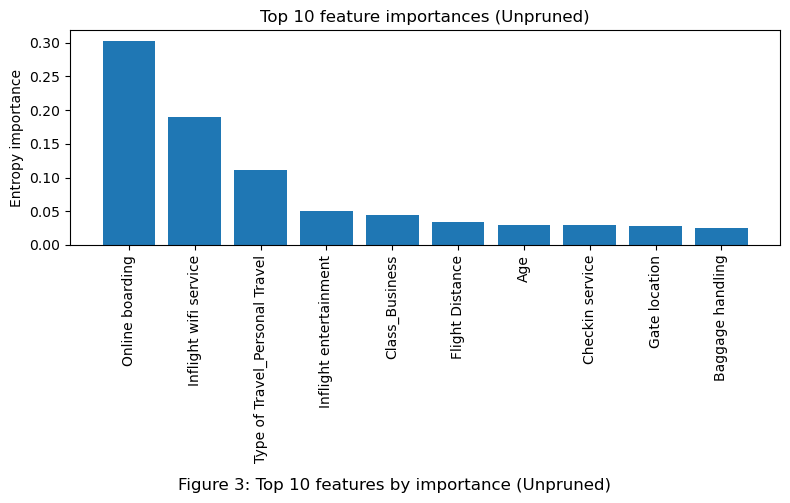

In [73]:
#Feature importance
importances_prepruned = clf_full.feature_importances_
indices_prepruned = np.argsort(importances_prepruned)[::-1]
feat_names = X_train.columns
top_k = 10

plt.figure(figsize=(8, 5))
plt.bar(range(top_k),
        importances_prepruned[indices_prepruned][:top_k])
plt.xticks(range(top_k),
           feat_names[indices_prepruned][:top_k],
           rotation=90)
plt.ylabel("Entropy importance")
plt.title("Top 10 feature importances (Unpruned)")
plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.figtext(0.5, 0.01, "Figure 3: Top 10 features by importance (Unpruned)", ha="center", fontsize=12)
plt.show()

We see that for the unpruned tree, Online boarding has by far the highest entropy importance, followed by Inflight wifi service and Type of Travel_Personal Travel, while other variables such as Inflight entertainment, Class_Business, and Flight Distance play a secondary role. This pattern suggests that, in this model, passenger satisfaction is driven primarily by the quality of the digital and booking experience and access to inflight connectivity, rather than by purely physical attributes such as baggage handling.​

For the Unpruned Classification Tree, the feature Online Boarding has the highest entropy importance, followed by Inflight wifi service and Type of Travel (Personal Travel). Other features, such as Inflight entertainment, Class_Business and Flight Distance play a less important role. This suggests that in this model, overall airline passenger satisfaction is mainly decided by the quality and experience of boarding online, e.g., online check-in, adding seats and the access and quality of connectivity during the flight. 

To visualise how the unpruned tree splits in our model, we will now plot a simplified version of the tree by restricting the maximum depth to three levels. This way, we can highlight the main decision rules:

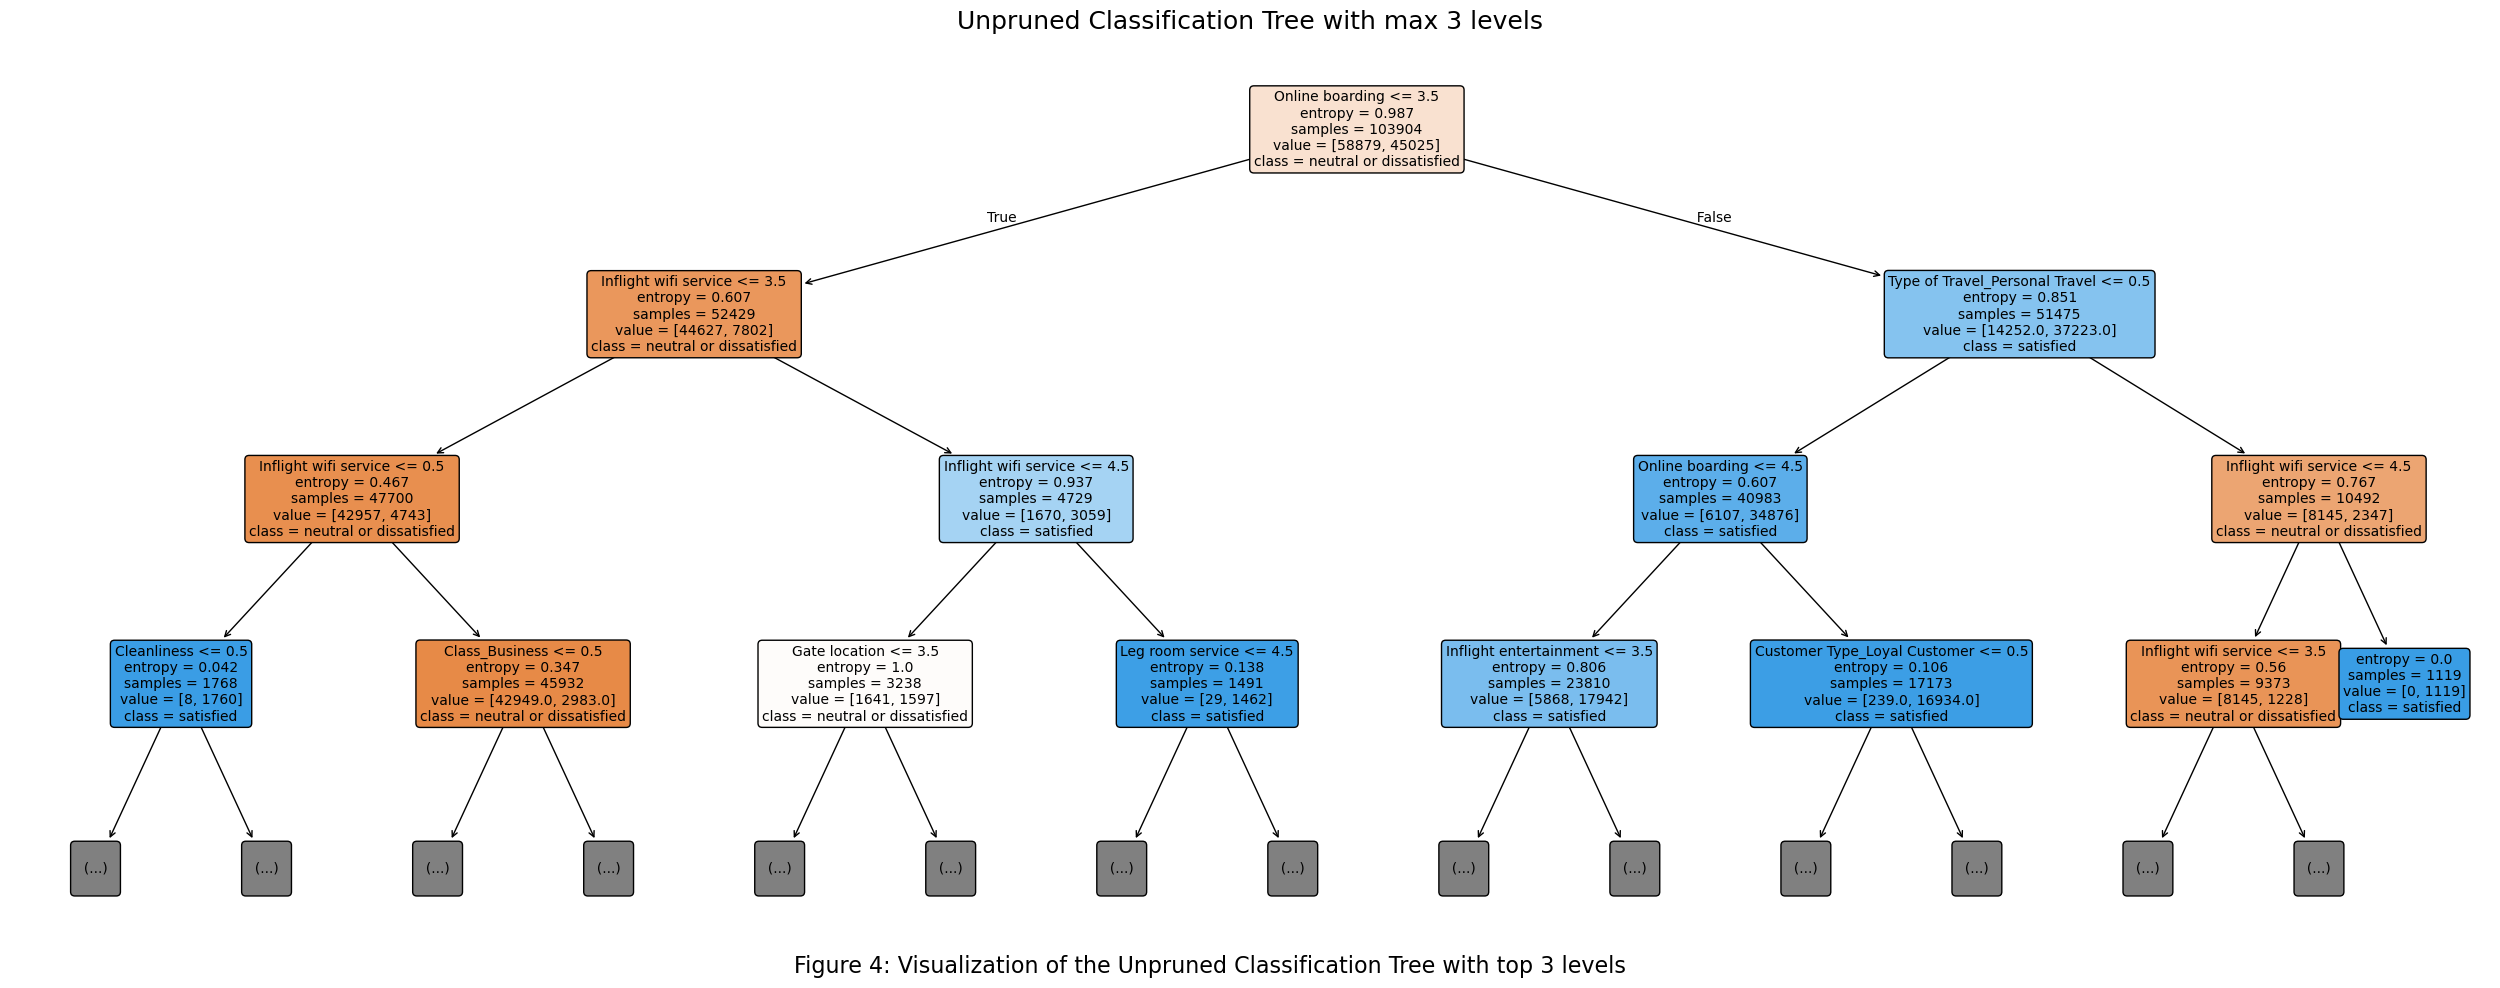

In [146]:
#Plotting the tree
plt.figure(figsize=(32, 12))  
plot_tree(
    clf_full,                   
    feature_names=X_train.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    max_depth=3,          
    fontsize=10                 
)
plt.title("Unpruned Classification Tree with max 3 levels", fontsize=18)
plt.figtext(0.5, 0.1, "Figure 4: Visualization of the Unpruned Classification Tree with top 3 levels", ha="center", fontsize=16)
plt.show()

The plot of the Unpruned Classification Tree confirms the previously ranked feature importances: as we can see that the root first splits on Online boarding, then by Inflight wifi service and Type of Travel_Personal Travel on the next level. Hence, this visualises well that the model first divides based on the digital check‑in and wifi connectivity experience, and afterwards,  the decisions are driven by travel purpose,  flight class, and other more comfort‑related features.

### Pruned Classification Tree

While the Unpruned Classification Tree achieves a high test accuracy of 94.6%, implying good generalisation, it is very complex and potentially quite unstable due to its large depth and number of leaves. Therefore, to control variance and complexity, we will proceed with pruning the classification tree. In order to identify a smaller tree that still has similar or better performance, we will proceed with tuning the complexity with ccp_alpha, i.e. trading off training error against the tree size, by using GridSearchCV, i.e. finding the best related cross-validation accuracy. 

In [75]:
#Pruned tree fitting
ccp_path = clf_full.cost_complexity_pruning_path(X_train, y_train_enc)
alphas = ccp_path.ccp_alphas

kfold = skm.KFold(n_splits=10, random_state=1, shuffle=True)

#Gridsearch
grid_ccp = skm.GridSearchCV(
    estimator=DTC(criterion='entropy', random_state=20),
    param_grid={'ccp_alpha': alphas},
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    refit=True
)

grid_ccp.fit(X_train, y_train_enc)
clf_pruned = grid_ccp.best_estimator_
best_alpha = grid_ccp.best_params_['ccp_alpha']

# 3) Printinf comparison: unpruned vs pruned

print("=== Unpruned tree ===")
print(f"Depth:  {clf_full.get_depth()}")
print(f"Leaves: {clf_full.get_n_leaves()}")
print(f"Train acc: {accuracy_score(y_train_enc, clf_full.predict(X_train)):.4f}")
print(f"Test  acc: {accuracy_score(y_test_enc,  clf_full.predict(X_test)):.4f}")
print()

print("=== Pruned tree (ccp_alpha via CV) ===")
print(f"Best ccp_alpha: {best_alpha:.6f}")
print(f"Best mean CV accuracy: {grid_ccp.best_score_:.4f}")
print(f"Depth:  {clf_pruned.get_depth()}")
print(f"Leaves: {clf_pruned.get_n_leaves()}")
print(f"Train acc: {accuracy_score(y_train_enc, clf_pruned.predict(X_train)):.4f}")
print(f"Test  acc: {accuracy_score(y_test_enc,  clf_pruned.predict(X_test)):.4f}")

=== Unpruned tree ===
Depth:  42
Leaves: 3884
Train acc: 1.0000
Test  acc: 0.9459

=== Pruned tree (ccp_alpha via CV) ===
Best ccp_alpha: 0.000063
Best mean CV accuracy: 0.9602
Depth:  26
Leaves: 433
Train acc: 0.9655
Test  acc: 0.9592


The Pruned Classification Tree has a depth of 26 and 433 leaves, which means the complexity of the tree was reduced significantly compared to the unpruned tree with a depth of 42 and 3884 leaves. The train accuracy dropped from 100% to 96.55%, the test accuracy slightly improved from around 94.6% to 95.92%, and the average cross-validation accuracy is at 96.02%. This indicates that the tree size and hence, the complexity, was not only drastically reduced but the model also maintains its generalisation performance, and even slightly improved. 
Therefore, pruning the tree simplified the model without trading off prediction accuracy.

As a next step, we will evaluate the pruned tree on our test dataset by plotting a confusion matrix to understand how the model is performing on the 2 classes.


Test set metrics (pruned)
-------------------------
Precision : 0.9703
Recall    :    0.9355
F1-score  : 0.9526


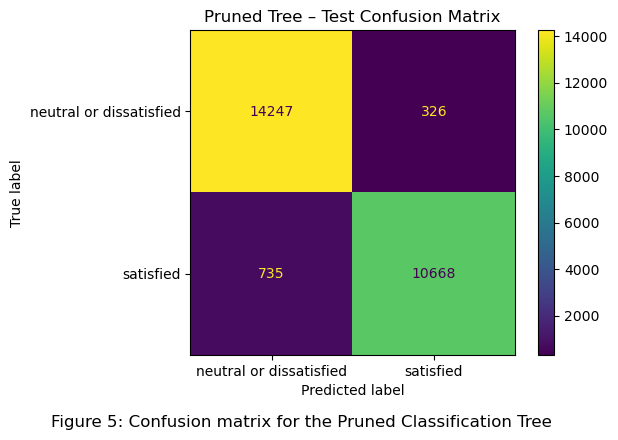

In [142]:
# === Pruned classification tree (ccp_alpha via CV) ===
y_pred_pruned = clf_pruned.predict(X_test)
test_acc_pruned = accuracy_score(y_test_enc, y_pred_pruned)
cm_pruned = confusion_matrix(y_test_enc, y_pred_pruned)

#Confusion matrix-related metrics
precision_pruned = precision_score(y_test_enc, y_pred_pruned)
recall_pruned    = recall_score(y_test_enc, y_pred_pruned)
f1_pruned        = f1_score(y_test_enc, y_pred_pruned)

print("\nTest set metrics (pruned)")
print("-------------------------")
print(f"{'Precision':10s}: {precision_pruned:6.4f}")
print(f"{'Recall':10s}:    {recall_pruned:6.4f}")
print(f"{'F1-score':10s}: {f1_pruned:6.4f}")

#Confision matrix
disp = CMD(confusion_matrix=cm_pruned, display_labels=le.classes_)
disp.plot(values_format='d')
plt.title("Pruned Tree – Test Confusion Matrix")
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.figtext(0.5, 0.1, "Figure 5: Confusion matrix for the Pruned Classification Tree", ha="center", fontsize=12)
plt.show()

Analysing the confusion matrix, we can see that the Pruned Classification Tree achieves a precision score of 97%, meaning the model predicts a passenger as satisfied correctly around 97% of the time. The recall score of 94% implies that around the same number of times truly satisfied passengers are correctly identified. The computed F1 score of 95% demonstrates that the pruned model is not only accurate but also well adjusted for the positive class 'satisfied'. Overall, the model performs slightly better now in regard to each class compared to the unpruned tree model, indicating it reduced variance while not introducing additional bias into the model.

We will now look at the top 10 most important features of our pruned tree to understand if there any changes compared to the unpruned tree. 

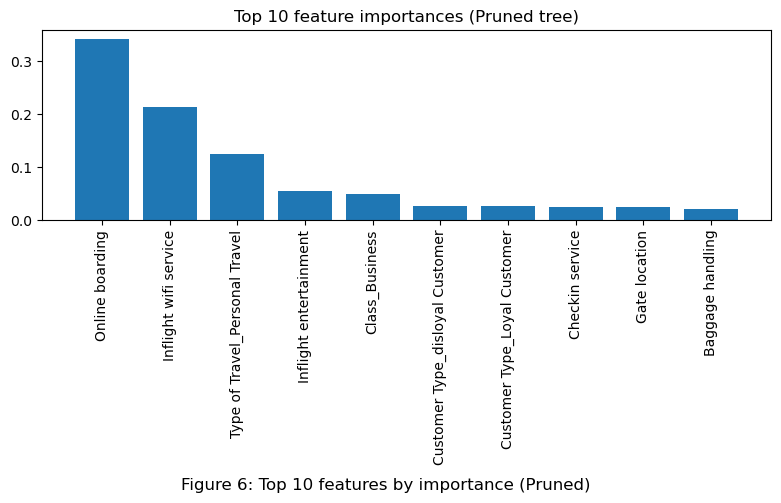

In [104]:
#Feature importance
clf_pruned = grid_ccp.best_estimator_
importances_pruned = clf_pruned.feature_importances_
indices_pruned = np.argsort(importances_pruned)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(top_k), importances_pruned[indices_pruned][:top_k])
plt.xticks(range(top_k), feat_names[indices_pruned][:top_k], rotation=90)
plt.title("Top 10 feature importances (Pruned tree)")
plt.tight_layout()
plt.subplots_adjust(bottom=0.55)
plt.figtext(0.5, 0.01, "Figure 6: Top 10 features by importance (Pruned)", ha="center", fontsize=12)
plt.show()


The overall ranking of feature importances is similar to the unpruned tree since Online boarding and Inflight wifi service are still the most important features, followed by Type of Travel (Personal Travel) and Inflight entertainment. Nevertheless, pruning the tree resulted in a slight increase in the relative contribution of other features, such as customer type (disloyal or loyal) and check‑in service. This indicates that once the deep and noisy branches are removed, the model relies slightly more evenly on a wide combination of service‑related features but keeps the same main features to predict airline satisfaction.

To visualise how the pruned tree splits, we will plot another visually simplified version of the tree by restricting the maximum depth to three levels again:

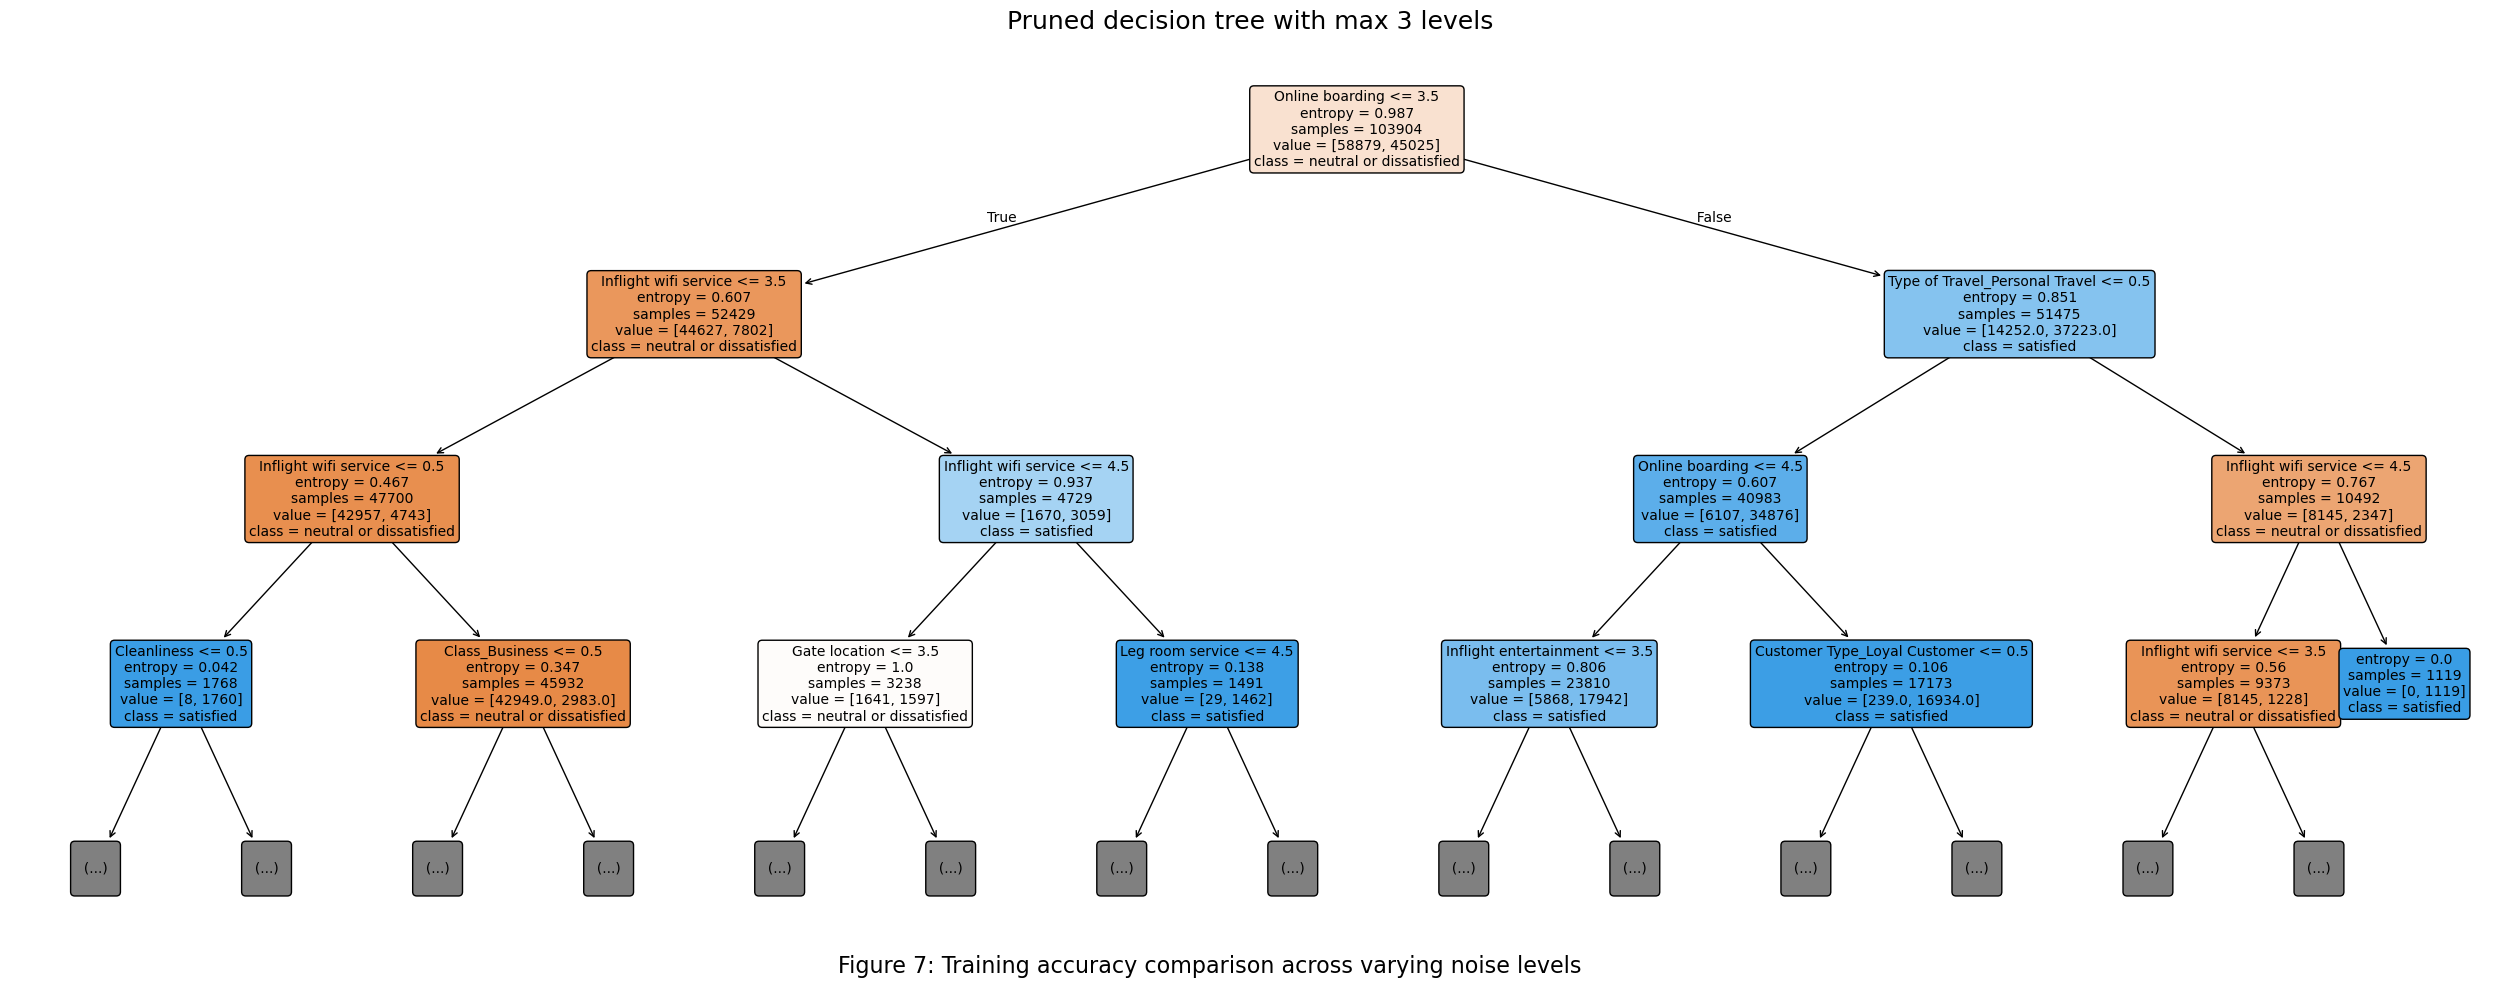

In [145]:
#Plotting the tree
plt.figure(figsize=(32, 12))
plot_tree(
    clf_pruned,
    feature_names=X_train.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    max_depth = 3,
    fontsize=10  
)
plt.title("Pruned decision tree with max 3 levels", fontsize=18)
plt.figtext(0.5, 0.1, "Figure 7: Training accuracy comparison across varying noise levels", ha="center", fontsize=16)
plt.show()

The pruned tree keeps the same top-level structure as for the unpruned tree since the root node still splits first on Online boarding, with the following splits on Inflight wifi service, Type of Travel. However, it does remove small branches further down, but the most important features remain the same.

### Random Forest

After fitting both unpruned and pruned classification trees, we will now fit a Random Forest to evaluate its predictive performance. While a single tree, even when pruned, might be quite unstable and can overfit, a Random Forest averages many trees grown on bootstrap samples with random subsets of features at each split. This reduces variance and typically should result in more robust test accuracy. It is important to note that we decided to optimise the Random Forest hyperparameters by using GridSearchCV, but only over a pre-defined space of parameters. The reason for this is that otherwise fitting the train would take unnecessarily long due to the large dataset and the number of trees that would be grown.

Firstly, we will fit the Random Forest and then analyse its predictive performance by looking at training, test and cross-validation accuracy and the related confusion metrics:

In [112]:
#Fitting random forest
#CV with fixed randomness for reproducability 
cv = KFold(n_splits=3, shuffle=True, random_state=0)

param_grid_rf = {
    'n_estimators': [100, 300],
    'max_depth': [None, 15, 30],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 0.5, 1.0],
}

rf_base = RFC(random_state=0)

rf_grid = skm.GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_rf,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train_enc)

rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)


Random Forest – train, test and CV accuracy
------------------------------------------
Train accuracy: 0.9999
Mean CV accuracy (best params): 0.9636
Test accuracy:  0.9648

Test set metrics for Random Forest
--------------------------------
Precision : 0.9756
Recall       : 0.9433
F1-score  : 0.9592


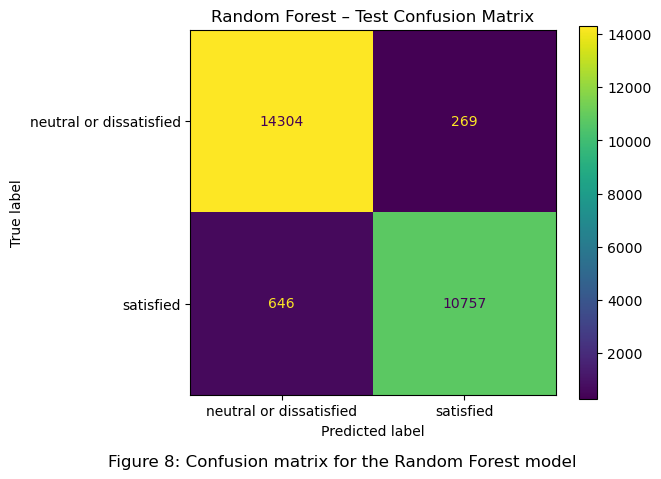

In [122]:
#Performance metrics
y_pred_rf_train = rf_best.predict(X_train)
rf_train_acc = accuracy_score(y_train_enc, y_pred_rf_train)

print("Random Forest – train, test and CV accuracy")
print("------------------------------------------")
print(f"Train accuracy: {rf_train_acc:6.4f}")
print(f"Mean CV accuracy (best params): {rf_grid.best_score_:6.4f}")

y_pred_rf = rf_best.predict(X_test)
rf_test_acc = accuracy_score(y_test_enc, y_pred_rf)
print(f"Test accuracy:  {rf_test_acc:6.4f}")

#Confusion matrix-related metrics
precision_rf = precision_score(y_test_enc, y_pred_rf)
recall_rf    = recall_score(y_test_enc, y_pred_rf)
f1_rf        = f1_score(y_test_enc, y_pred_rf)

print("\nTest set metrics for Random Forest")
print("--------------------------------")
print(f"{'Precision':10s}: {precision_rf:6.4f}")
print(f"{'Recall':10s}   : {recall_rf:6.4f}")
print(f"{'F1-score':10s}: {f1_rf:6.4f}")

#Confusion matrix
cm_rf = confusion_matrix(y_test_enc, y_pred_rf)
disp_rf = CMD(confusion_matrix=cm_rf, display_labels=le.classes_)
disp_rf.plot(values_format='d')
plt.title("Random Forest – Test Confusion Matrix")
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.figtext(0.5, 0.01, "Figure 8: Confusion matrix for the Random Forest model", ha="center", fontsize=12)
plt.show()

The Random Forest model fits the training data perfectly with a training accuracy of around 99.99% since it grows deeply, implying overfitting its own bootstrap samples. However, it still achieves high test performance, with a test accuracy of about 96% which is even slightly better than the previous two models. Furthermore, all confusion metrics are also slightly better compared to the Unpruned and Pruned Classification Tree models. The reason for this small improvement comes from the Random Forest splitting only based on a random subset of features that are available, making their errors less correlated and averaging the bootstrapped trees reduces variance. Hence, the model here is slightly better at generalization. 

We will analyse now the top 10 most important features for Random Forest as well:

In [ ]:
#Most important features
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]
feat_names = X_train.columns

top_k = 10
plt.figure(figsize=(8,5))
plt.bar(range(top_k), importances[indices][:top_k])
plt.xticks(range(top_k), feat_names[indices][:top_k], rotation=90)
plt.title("Top 10 feature importances (Random Forest)")
plt.tight_layout()
plt.show()

The most important features are still Online boarding and Inflight wifi service. They are, however, now followed by travel class (Business and Eco), travel type (business vs personal), inflight entertainment. This indicates that both service quality and better flight class, and the type of travel, impact the model’s prediction the most. 

### Unpruned Classification Tree vs Pruned Classification Tree vs Random Forest

Overall, the Random Forest model achieved the highest predictive performance with a test accuracy of around 96.5% and hence is by a small margin outperforming the Pruned Classification Tree (around 95.9%). Furthermore, the Unpruned Classification Tree successfully corrected the Unpruned Tree’s issue of overfitting, which was reflected in 100% train accuracy. Despite differences in model complexity, all three performed well at predicting airline satisfaction and the key features that drive it. In all three models, Online Boarding is the most important feature, followed by Inflight Wifi Service, and, 2 out of 3 times, by Type of Travel. This clearly shows that across models, digital convenience and connectivity are strong predictors of airline satisfaction and are worth investing in to improve an airline's overall perception. Additionally, our results showcased what we learned during the literature review. Unpruned Decision Trees tend to overfit heavily, while Pruned Trees reduce variance and correct overfitting and as expected, Random Forest performed the best overall.  

### Experiment: Flipping the output labels to test the robustness of our three Decision Tree models

All three Decision Tree models are performing well, especially since the dataset we used was already very clean, and we successfully improved it by further pre-processing. Therefore, to understand how these models compare to each other when we introduce noise, we will conduct a small experiment. As data is not always this perfect, we will, in a sense, simulate data corruption, meaning, for instance, errors were made during data collection. To do so, we will randomly flip the output labels for our training data but keep the test dataset untouched. This way, we can analyse which model still finds the correct patterns despite the training set containing wrong information. Hence, we can evaluate the robustness of each model. Furthermore, to not overcomplicate the experiment, reduce computational processing time and ensure better comparability, we will use the same best hyperparameters we found in the previous steps. In our experiment, we will introduce noise percentage-wise, i.e., 0%, 10%, 20% and 30%. Finally, we will compare the results for all 3 models in a table and also plot the training and test accuracy. 

In [143]:
# 0. Function for flipping a portion of binary labels in training y (0/1)
def flip_labels(y, noise_rate, random_state=0):
    rng = np.random.RandomState(random_state)
    y_noisy = y.copy()
    n = len(y_noisy)
    n_flip = int(noise_rate * n)
    if n_flip > 0:
        idx = rng.choice(n, size=n_flip, replace=False)
        y_noisy[idx] = 1 - y_noisy[idx]  # assumes labels are 0/1
    return y_noisy

# 1. Functions that clone hyperparameters

def make_unpruned_tree():
    return DTC(
        criterion=clf_full.criterion,
        max_depth=clf_full.max_depth,
        min_samples_split=clf_full.min_samples_split,
        min_samples_leaf=clf_full.min_samples_leaf,
        ccp_alpha=getattr(clf_full, "ccp_alpha", 0.0),
        random_state=20
    )

def make_pruned_tree():
    return DTC(
        criterion=clf_pruned.criterion,
        max_depth=clf_pruned.max_depth,
        min_samples_split=clf_pruned.min_samples_split,
        min_samples_leaf=clf_pruned.min_samples_leaf,
        ccp_alpha=getattr(clf_pruned, "ccp_alpha", 0.0),
        random_state=20
    )

def make_rf():
    return RFC(
        n_estimators=rf_best.n_estimators,
        max_depth=rf_best.max_depth,
        min_samples_split=rf_best.min_samples_split,
        min_samples_leaf=rf_best.min_samples_leaf,
        max_features=rf_best.max_features,
        bootstrap=rf_best.bootstrap,
        random_state=0,
        n_jobs=-1
    )

# 2. Original 0% noise metrics from the already fitted models 

orig_train_un = accuracy_score(y_train_enc, clf_full.predict(X_train))
orig_test_un  = accuracy_score(y_test_enc,  clf_full.predict(X_test))

orig_train_pr = accuracy_score(y_train_enc, clf_pruned.predict(X_train))
orig_test_pr  = accuracy_score(y_test_enc,  clf_pruned.predict(X_test))

orig_train_rf = accuracy_score(y_train_enc, rf_best.predict(X_train))
orig_test_rf  = accuracy_score(y_test_enc,  rf_best.predict(X_test))

results = []

results.append((
    0.0,
    orig_train_un, orig_test_un,
    orig_train_pr, orig_test_pr,
    orig_train_rf, orig_test_rf
))

# 3. Noisy-label fits for >0% noise with new clones

noise_levels = [0.10, 0.20, 0.30]

for noise in noise_levels:
    y_train_noisy = flip_labels(y_train_enc, noise_rate=noise, random_state=25)

    tree_un = make_unpruned_tree().fit(X_train, y_train_noisy)
    tree_pr = make_pruned_tree().fit(X_train, y_train_noisy)
    rf      = make_rf().fit(X_train, y_train_noisy)

    train_un = accuracy_score(y_train_noisy, tree_un.predict(X_train))
    test_un  = accuracy_score(y_test_enc,   tree_un.predict(X_test))

    train_pr = accuracy_score(y_train_noisy, tree_pr.predict(X_train))
    test_pr  = accuracy_score(y_test_enc,    tree_pr.predict(X_test))

    train_rf = accuracy_score(y_train_noisy, rf.predict(X_train))
    test_rf  = accuracy_score(y_test_enc,    rf.predict(X_test))

    results.append((
        noise,
        train_un, test_un,
        train_pr, test_pr,
        train_rf, test_rf
    ))

robust_df = pd.DataFrame(
    results,
    columns=[
        "Noise_rate",
        "Unpruned_train_acc", "Unpruned_test_acc",
        "Pruned_train_acc",   "Pruned_test_acc",
        "RF_train_acc",       "RF_test_acc"
    ]
)

robust_df


,Noise_rate,Unpruned_train_acc,Unpruned_test_acc,Pruned_train_acc,Pruned_test_acc,RF_train_acc,RF_test_acc
0,0.0,1.0,0.945912,0.965507,0.959155,0.999894,0.964775
1,0.1,1.0,0.843740,0.870939,0.956652,0.986555,0.961926
2,0.2,1.0,0.749962,0.778700,0.950454,0.981031,0.955382
3,0.3,1.0,0.663497,0.682774,0.939521,0.994187,0.926086


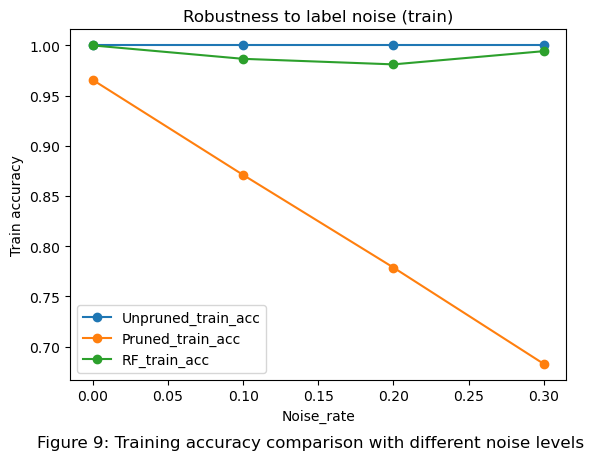

In [136]:
#Plotting the different train accuracies for each noise level
ax = robust_df.plot(
    x="Noise_rate",
    y=["Unpruned_train_acc", "Pruned_train_acc", "RF_train_acc"],
    marker="o"
)

ax.set_ylabel("Train accuracy")
ax.set_title("Robustness to label noise (train)")
plt.subplots_adjust(bottom=0.15)
plt.figtext(0.5, 0.01, "Figure 9: Training accuracy comparison with different noise levels", ha="center", fontsize=12)

plt.show()

Text(0.5, 0.01, 'Figure 10: Test accuracy comparison with different noise levels')

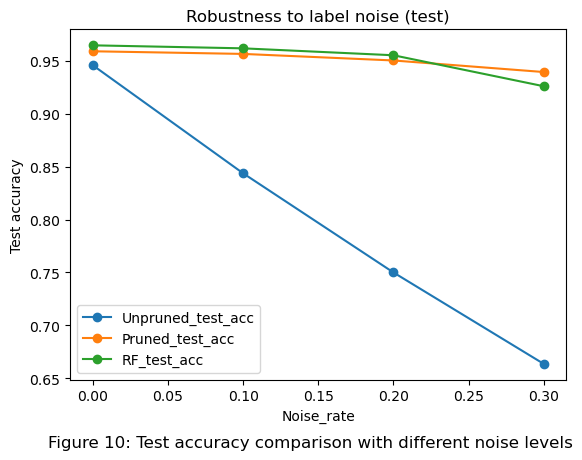

In [135]:
#Plotting the different test accuracies for each noise level
ax = robust_df.plot(
    x="Noise_rate",
    y=["Unpruned_test_acc", "Pruned_test_acc", "RF_test_acc"],
    marker="o",
)
ax.set_ylabel("Test accuracy")
ax.set_title("Robustness to label noise (test)")
plt.subplots_adjust(bottom=0.15)
plt.figtext(0.5, 0.01, "Figure 10: Test accuracy comparison with different noise levels", ha="center", fontsize=12)

The experiment shows clear differences between the performance of predicting airline satisfaction on correct labels and the robustness when those output labels are corrupted by randomly flipping them. We can see that Random Forest has the highest test accuracy on uncorrupted training data (0% label flipping), with minimal better performance than the pruned tree and relatively higher performance than the unpruned fully grown tree. Hence, Random Forest has the best predicting performance of airline satisfaction when the output labels are correct and reliable. 

When the noise level increases, the unpruned tree’s and the Random Forest’s training accuracy stays stable, 100% and 99.99-98% respectively, whereas the pruned tree’s training accuracy drops approximately aligned to the introduced amount of noise from 96.5% to 68.27%. 

The unpruned tree can grow very deep and keeps splitting until it fits the training label perfectly, leading to clear overfitting. This means when noise is introduced, it will fit the noise as well, and when the accuracy is tested on the clean test dataset, it will perform poorly.  More precisely, the unpruned tree’s test accuracy decreases from 94.6% to 66.35%, which approximately mirrors the 30% noise level. This makes the fully grown Classification Tree the least stable model in the experiment. 
 
In contrast, the pruned tree is constrained by hyperparameters, such as  Cost-Complexity Pruning Alpha (ccp_alpha), depth and leave-size, which were all tuned on clean data. This prevents the tree from fitting every flipped training label, explaining the sharp decrease in training accuracy with increasing levels of noise. Since it cannot fully adapt to the label noise, the tree retains the same decision structure that it learned from the previous uncorrupted training dataset and ignores more of the noise. This yields slightly lower accuracy than the Random Forest at the 0% noise level and exhibits the slowest decline in test accuracy with increasing noise levels. Test accuracy drops from approximately 95.6% to approximately 94%, despite 30% of the output labels being flipped. Hence, at the highest level of noise, the pruned tree exceeds both the unpruned tree’s and the Random Forest’s test accuracy, making it the most robust and stable model.

The Random Forest model aggregates many decorrelated deep trees grown on bootstrap samples and feature subsets, therefore averaging out some overfitting, which explains why it performs best on clean data and stays more stable than a single unpruned tree as the noise level increases. Nevertheless, at 30% label noise, test accuracy decreases from approximately 96.47% to approximately 92.6%, which is more than twice the decrease observed for the pruned tree. The results indicate that many of the grown trees still learn the wrong patterns due to the flipped labels, resulting in overall test accuracy falling below that of the pruned tree. 

Overall, the Unpruned Classification Tree and Random Forest are low-bias but high-variance models that fit label noise to different degrees, which is reflected in their very high training accuracy and declining test accuracy as noise increases. In contrast, pruning only increases bias slightly and reduces variance, leading to a slight decrease in test accuracy on uncorrupted labels but maintaining robustness when the labels are corrupted. This is demonstrated in its lower training accuracy and nearly flat test accuracy curve at 30% noise.
Hence, our experiment shows that a regularised Pruned Classification Tree is the most stable when noise is introduced. 

This demonstrates the trade-off between model complexity and robustness, since highly complex models like Random Forests might perform best with low-noise, regularised models, such as Pruned Classification Trees, which can handle data corruption better while maintaining relatively stable test accuracy. 

## Conclusion

In conclusion, the project has successfully examined the predictive performance of the three models, namely the Unpruned and Pruned Classification Tree, and Random Forest, on the determinants of U.S. airlines customer satisfaction. The original dataset was cleaned by removing irrelevant columns and one-hot encoding all categorical features, and label encoding the target variable 'satisfaction'. The findings illustrate the high adaptability of all three models to the cleaned dataset, with the test accuracy of the Unpruned classification Tree, Pruned Classification Tree, and Random Forest at around 95%, 96%, and 97%. All models concluded that “Online Boarding” and “Inflight wifi service” were the two most essential factors that affect the satisfaction of the passengers. This, therefore, implies that airlines should focus on digital service experience over traditional flight metrics like baggage handling or Inflight service to increase customer satisfaction.

As a result, Random Forest appears to slightly outperform the other two algorithms since the model averages many decorrelated deep trees grown on bootstrapped samples and subsets of features to avoid overfitting, which explains why it performs best on clean data.

To reaffirm this finding and its robustness, each model underwent another test, in which the labels of a particular proportion of response data were randomly flipped (10%, 20%, and 30%). Under these circumstances, while the Unpruned Classification Tree immediately shows its disadvantage since it overfits the relabelled dataset, the Pruned Classification Tree and Random Forest show negligible decreases in their accuracy as the noise rate increases. At the noise rate of 30%, the Random Forest’s accuracy drops, making the Pruned Classification Tree the most robust model for highly noisy or unreliable survey data.

## References

[1] Baswardono, A., Suryono, S., Noersasongko, E., Utomo, Y., Santoso, E.B. and Tolle, H., 2019. Prediction of airline passenger satisfaction using machine learning algorithms. Journal of Physics: Conference Series, 1402(6), p.066055. Available at: https://iopscience.iop.org/article/10.1088/1742-6596/1402/6/066055 [Accessed 8 Dec. 2025].

[2] Suprapto, D. and Oetama, R., 2023. Analysis of Airline Passenger Satisfaction Using Decision Tree and Naïve Bayes Algorithms. Jurnal Informatika Ekonomi Bisnis, 5(4), 1493-1500. Available at: https://doi.org/10.37034/infeb.v5i4.728 [Accessed 8 Dec. 2025].

[3] Mirthipati, T., 2024. Enhancing Airline Customer Satisfaction: A Machine Learning and Causal Analysis Approach. Cornell University. Available at: https://arxiv.org/abs/2405.09076 [Accessed 8 Dec. 2025].

[4] Hong, A., Khaw, K., Chew, X. and Yeong, W., 2023. Prediction of US airline passenger satisfaction using machine learning algorithms. Data Analytics and Applied Mathematics, vol. 4, no. 1, pp. 7–22. Available at: https://journal.ump.edu.my/daam/article/view/9071 [Accessed 8 Dec. 2025].

[5] Hastie et al., 2023. An Introduction to Statistical Learning with Applications in Python, Springer Nature Switzerland. Available at: An Introduction to Statistical Learning: with Applications in Python | SpringerLink  [Accessed 8 Dec. 2025].

[6] Steven, A., Dong, Y. and Dresner, M., 2012, Linkages between customer service, customer satisfaction and performance in the airline industry: Investigation of non-linearities and moderating effects. Transportation Research Part E: Logistics and Transportation Review. Science Direct. Available at: https://www.sciencedirect.com/science/article/abs/pii/S136655451100158X [Accessed 8 Dec. 2025].

[7] Song, Y. and Lu, Y., 2015. Decision tree methods: applications for classification
and prediction. Shanghai Archives of Psychiatry, 2015, Vol. 27, No. 2. Available at: 
https://www.scienceopen.com/document_file/942743a9-813f-4174-b996-0883d39b53f7/PubMedCentral/942743a9-813f-4174-b996-0883d39b53f7.pdf  [Accessed 8 Dec. 2025].

[8] AlHabbal, R., 2022. Predicting & Optimizing Airlines Customer Satisfaction Using
Classification. Rochester Institute of Technology. Available at: https://repository.rit.edu/cgi/viewcontent.cgi?article=12513&context=theses  [Accessed 8 Dec. 2025].


# AI Statement

During this project, the AI tool Perplexity, Gemini and Grammarly were used to assist with correcting grammar, refining Python code, and explaining Python syntax errors. 